## Libraries

In [10]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Preprocessing

In [2]:
### Training images preprocessing

In [11]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70243 files belonging to 38 classes.


### Validattion Images preprocessing

In [12]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17557 files belonging to 38 classes.


## Avoiding Overshooting in Loss Functions


## To avoid overshooting, you can:

## Use an appropriate learning rate: Ensure that the learning rate is not too high. You can start with a small learning rate and gradually increase it, or use techniques like learning rate scheduling.
## Gradient clipping: Clip the gradients during backpropagation to prevent excessively large updates.
## Use adaptive learning rate optimizers: Optimizers like Adam, RMSprop, or AdaGrad adjust the learning rate dynamically based on the training process, which can help mitigate overshooting.

## Building model

In [18]:
cnn = tf.keras.models.Sequential()

In [6]:
## Building Convolution Layer


In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [10]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [11]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [12]:
cnn.add(tf.keras.layers.Dropout(0.25))


In [13]:
cnn.add(tf.keras.layers.Flatten())


In [14]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))


In [15]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [16]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

## Compiling and Training Phase

In [17]:
cnn.compile(optimizer=tf.keras.optimizers.legacy.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [18]:
cnn.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

In [19]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)


Epoch 1/10
2196/2196 [==============================] - 848s 385ms/step - loss: 1.8891 - accuracy: 0.4533 - val_loss: 0.9483 - val_accuracy: 0.7165
Epoch 2/10
2196/2196 [==============================] - 807s 367ms/step - loss: 0.9141 - accuracy: 0.7151 - val_loss: 0.5999 - val_accuracy: 0.8074
Epoch 3/10
2196/2196 [==============================] - 799s 364ms/step - loss: 0.6487 - accuracy: 0.7951 - val_loss: 0.3879 - val_accuracy: 0.8750
Epoch 4/10
2196/2196 [==============================] - 798s 364ms/step - loss: 0.4955 - accuracy: 0.8401 - val_loss: 0.3471 - val_accuracy: 0.8902
Epoch 5/10
2196/2196 [==============================] - 805s 367ms/step - loss: 0.4026 - accuracy: 0.8698 - val_loss: 0.2696 - val_accuracy: 0.9103
Epoch 6/10
2196/2196 [==============================] - 811s 370ms/step - loss: 0.3351 - accuracy: 0.8912 - val_loss: 0.2862 - val_accuracy: 0.9073
Epoch 7/10
2196/2196 [==============================] - 808s 368ms/step - loss: 0.2918 - accuracy: 0.9038 - val_

In [21]:
## Evaluation

In [22]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

2196/2196 [==============================] - 205s 93ms/step - loss: 0.1192 - accuracy: 0.9594
Training accuracy: 0.959398090839386


In [23]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

549/549 [==============================] - 50s 91ms/step - loss: 0.1871 - accuracy: 0.9403
Validation accuracy: 0.940308690071106


In [24]:
cnn.save('trained_plant_disease_model.keras')

In [25]:
training_history.history #Return Dictionary of history

{'loss': [1.889054775238037,
  0.9140877723693848,
  0.6486939787864685,
  0.4955012798309326,
  0.40261006355285645,
  0.3351426124572754,
  0.2918365001678467,
  0.24567344784736633,
  0.21622373163700104,
  0.19293762743473053],
 'accuracy': [0.453269362449646,
  0.7150890231132507,
  0.7951254844665527,
  0.8400837182998657,
  0.8698375821113586,
  0.8911635279655457,
  0.9037626385688782,
  0.9190381765365601,
  0.9277365803718567,
  0.9353814721107483],
 'val_loss': [0.9482812881469727,
  0.5998508930206299,
  0.3878852128982544,
  0.34714412689208984,
  0.2695726156234741,
  0.2862354516983032,
  0.24063771963119507,
  0.23843179643154144,
  0.21737293899059296,
  0.18705442547798157],
 'val_accuracy': [0.7164663672447205,
  0.8073703050613403,
  0.8749786615371704,
  0.8901862502098083,
  0.9103491306304932,
  0.9072734713554382,
  0.9205445051193237,
  0.9222532510757446,
  0.933815598487854,
  0.940308690071106]}

In [26]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [27]:
print('History is : ')
print(training_history.history.keys())

History is : 
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [28]:
## Accuracy Visualization

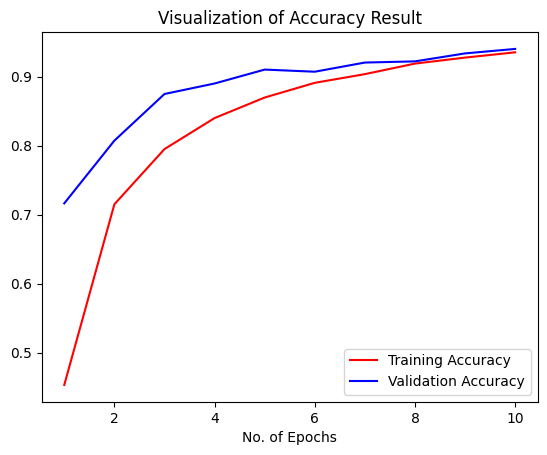

In [29]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

In [30]:
## More metrics for model evaluation

In [37]:
class_name = validation_set.class_names

In [13]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17557 files belonging to 38 classes.


In [20]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

17557/17557 [==============================] - 98s 6ms/step


In [21]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [42]:
Y_true

<tf.Tensor: shape=(17557,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [43]:
predicted_categories

<tf.Tensor: shape=(17557,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [45]:
!pip install scikit-learn

   ---------------------------------------- 0.0/9.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.3 MB ? eta -:--:--
   ---------------------------------------- 0.1/9.3 MB 525.1 kB/s eta 0:00:18
    --------------------------------------- 0.1/9.3 MB 1.0 MB/s eta 0:00:09
    --------------------------------------- 0.2/9.3 MB 1.1 MB/s eta 0:00:09
   - -------------------------------------- 0.2/9.3 MB 1.3 MB/s eta 0:00:07
   - -------------------------------------- 0.4/9.3 MB 1.7 MB/s eta 0:00:06
   -- ------------------------------------- 0.6/9.3 MB 1.9 MB/s eta 0:00:05
   ---- ----------------------------------- 1.0/9.3 MB 2.8 MB/s eta 0:00:03
   ------ --------------------------------- 1.4/9.3 MB 3.4 MB/s eta 0:00:03
   -------- ------------------------------- 2.1/9.3 MB 4.7 MB/s eta 0:00:02
   ----------- ---------------------------- 2.7/9.3 MB 5.3 MB/s eta 0:00:02
   ---------------- ----------------------- 3.9/9.3 MB 7.1 MB/s eta 0:00:01
   -------------------- 

In [46]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [47]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.94      0.93      0.93       504
                                 Apple___Black_rot       0.98      0.97      0.98       497
                          Apple___Cedar_apple_rust       0.98      0.92      0.95       440
                                   Apple___healthy       0.91      0.94      0.92       502
                               Blueberry___healthy       0.95      0.95      0.95       454
          Cherry_(including_sour)___Powdery_mildew       0.98      0.95      0.96       421
                 Cherry_(including_sour)___healthy       0.98      0.98      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.94      0.88      0.91       395
                       Corn_(maize)___Common_rust_       0.98      1.00      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.93      0.96      0.

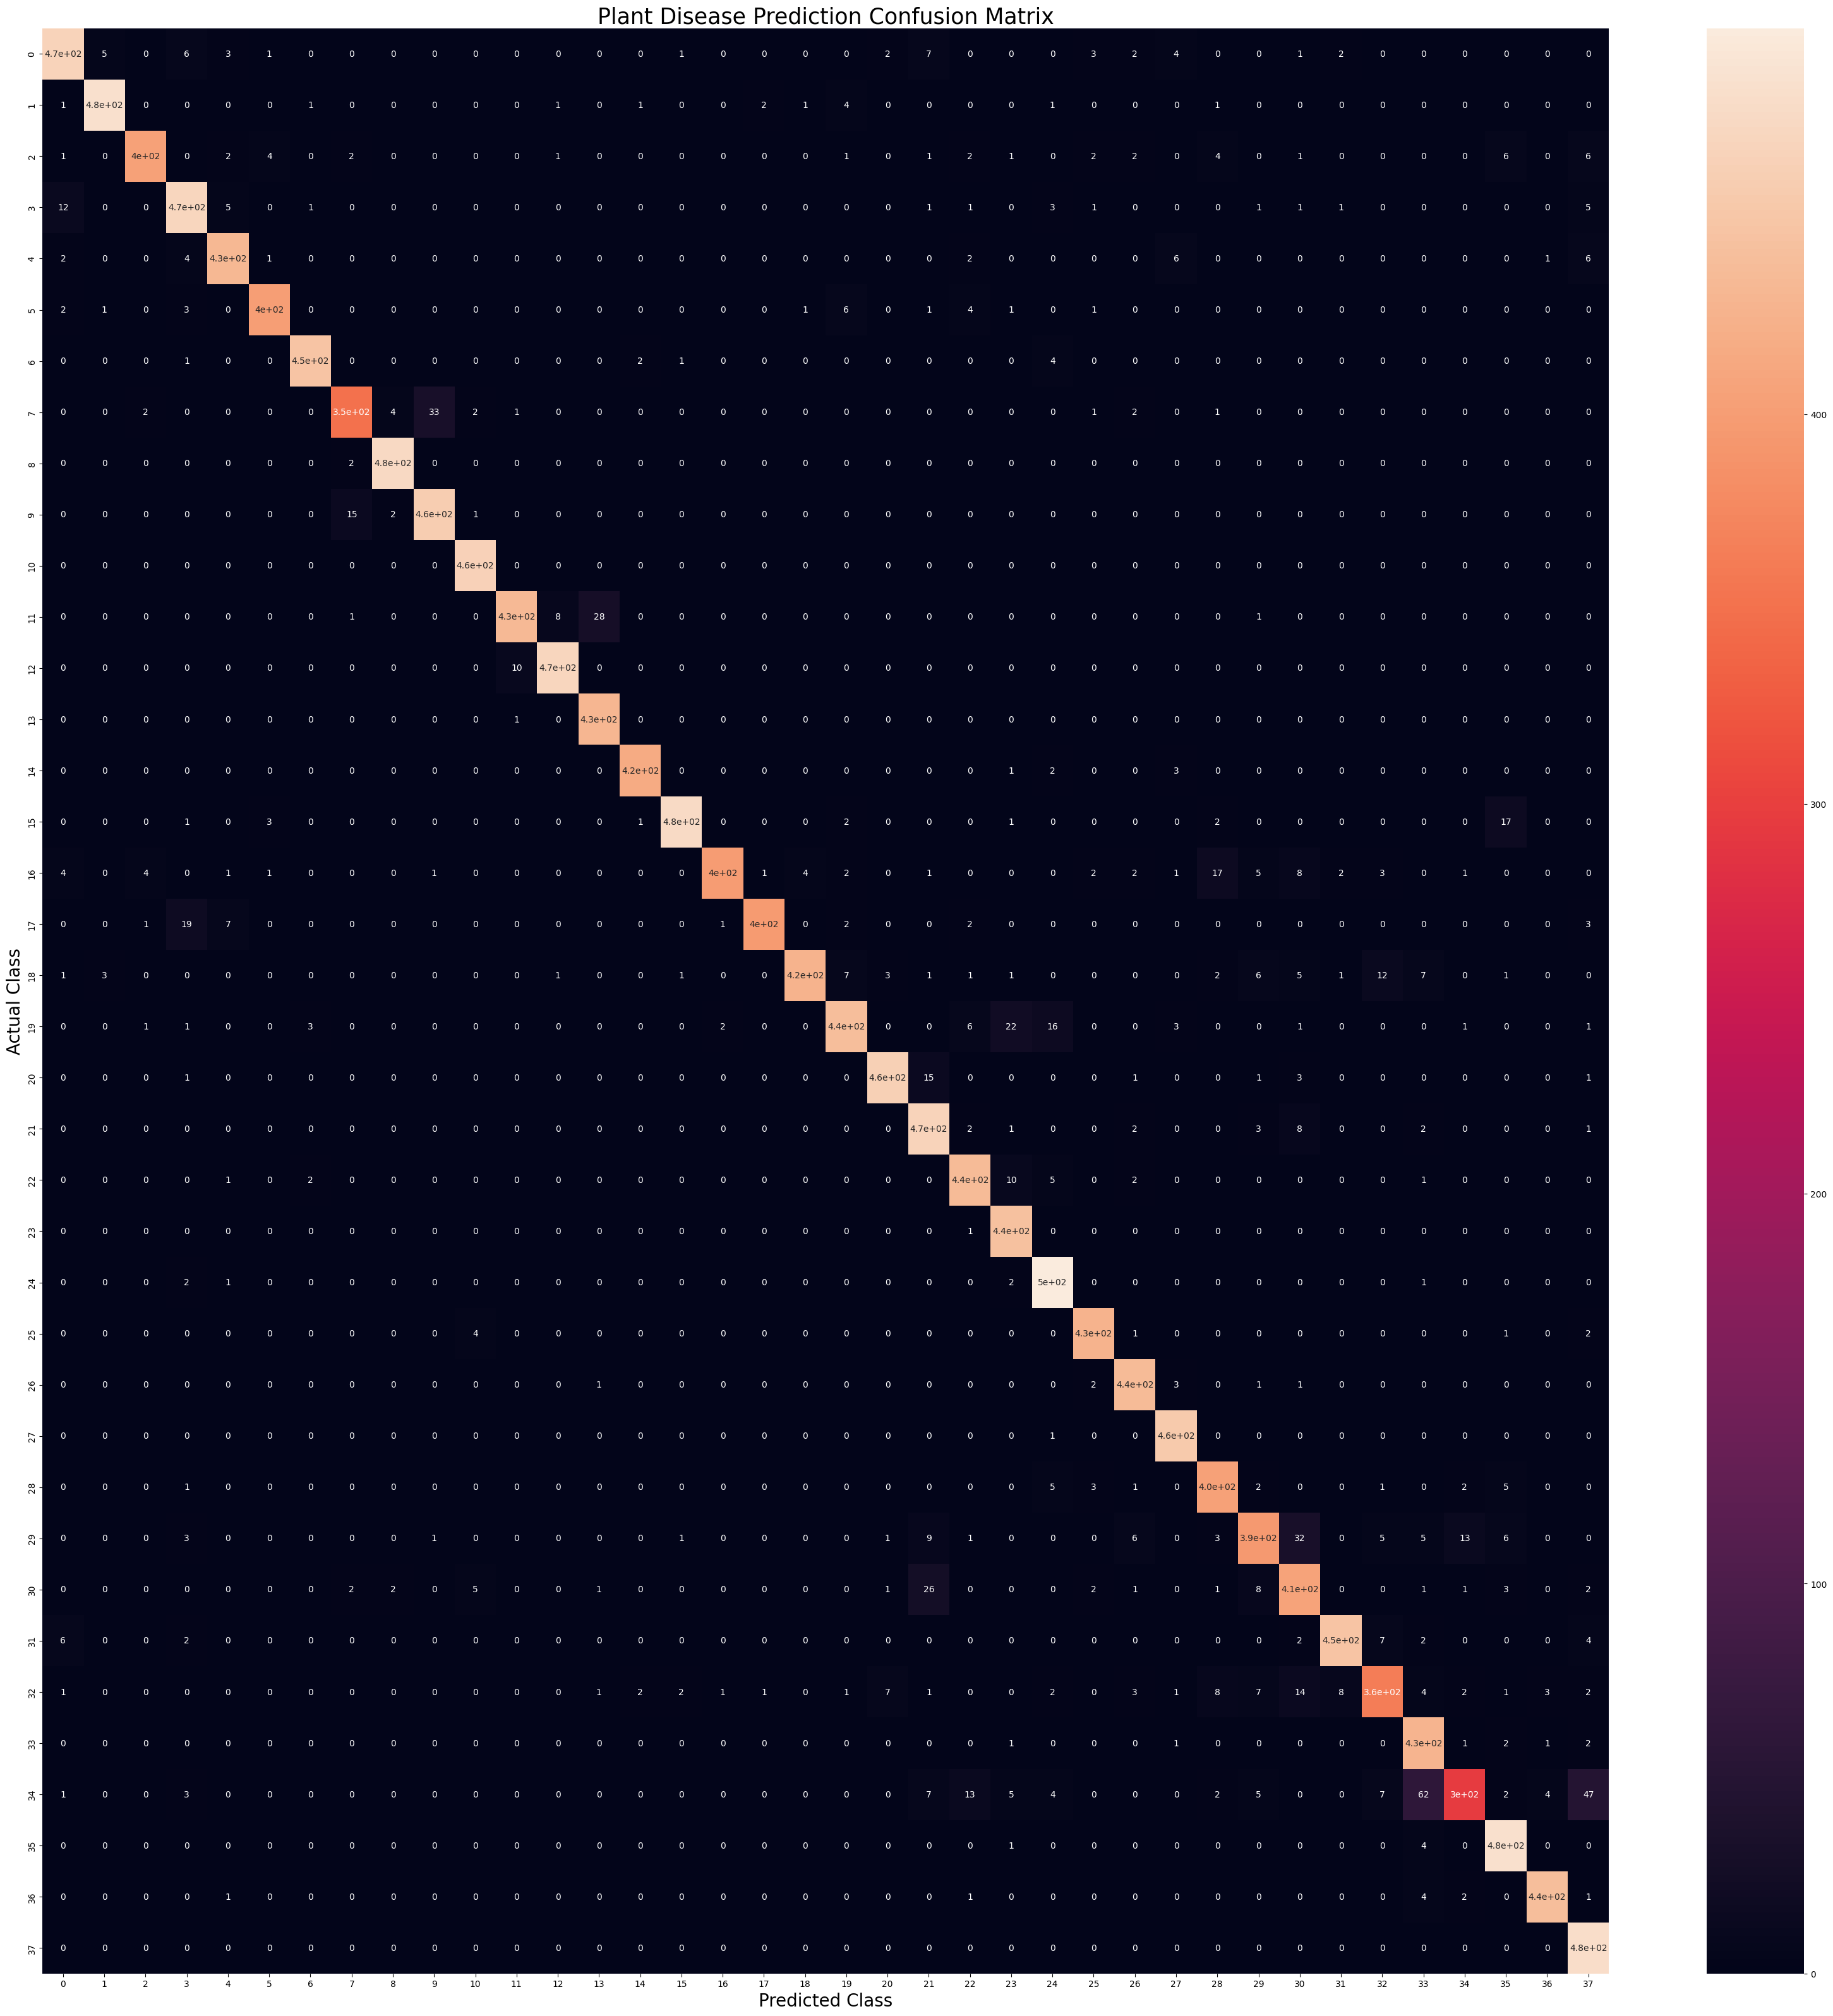

In [48]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()

In [1]:
import os

def count_images_in_directory(directory):
    return sum([len(files) for r, d, files in os.walk(directory)])

train_dir = 'train'
valid_dir = 'valid'

num_train_images = count_images_in_directory(train_dir)
num_valid_images = count_images_in_directory(valid_dir)

print(f'Total number of training images: {num_train_images}')
print(f'Total number of validation images: {num_valid_images}')


Total number of training images: 70243
Total number of validation images: 17557


In [2]:
##datset after splitting

In [14]:
import tensorflow as tf

# Calculate the number of batches in the training and validation datasets
num_train_batches = tf.data.experimental.cardinality(training_set).numpy()
num_valid_batches = tf.data.experimental.cardinality(validation_set).numpy()

batch_size = 32  # Replace with your actual batch size
num_train_images = num_train_batches * batch_size
num_valid_images = num_valid_batches * batch_size

print(f'Number of training images: {num_train_images}')
print(f'Number of validation images: {num_valid_images}')


Number of training images: 70272
Number of validation images: 17568


In [15]:
## dataset after split

In [16]:
import tensorflow as tf

# Calculate the number of images in the training and validation datasets
num_train_batches = tf.data.experimental.cardinality(training_set).numpy()
num_valid_batches = tf.data.experimental.cardinality(validation_set).numpy()

batch_size = 32  # or your actual batch size
num_train_images = num_train_batches * batch_size
num_valid_images = num_valid_batches * batch_size

print(f'Number of training images: {num_train_images}')
print(f'Number of validation images: {num_valid_images}')


Number of training images: 70272
Number of validation images: 17568
